In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import rebound
%matplotlib inline
import pandas as pd
import matplotlib.gridspec as gridspec
from matplotlib.patches import ConnectionPatch

plt.style.use('paper.mplstyle')

In [2]:
dfrand = pd.read_csv('../csvs/random_summary.csv', index_col=0)
dfrand = dfrand[(dfrand['Mean'] > 4) & (dfrand['Mean'] < 7)]
dfrand.head()

,ID,instability_time,Mean,Sigma,KSpval,tlyap10,Nlyap10
0,1,5.501436e+05,5.480027,0.347572,0.685497,593.820388,926.447883
1,1007,6.866933e+05,5.589877,0.459087,0.061534,NaN,NaN
2,1021,5.912132e+05,6.003697,0.330846,0.828219,760.306801,777.598225
3,1025,1.185226e+07,5.799719,0.386725,0.061534,NaN,NaN
4,1041,1.136642e+05,5.725149,0.489056,0.003763,11366.432725,9.999991


In [3]:
dfrand.shape

(246, 7)

In [4]:
cutoffrand = 4.6e-27 # from instabilitytimehistograms.ipynb
badrand = (dfrand['KSpval'] < cutoffrand)
badrand.sum()

13

In [5]:
print("Fraction of bad random systems:{0:.3f}".format(badrand.sum()/dfrand.shape[0]))

Fraction of bad random systems:0.053


In [6]:
dfrand[(dfrand['KSpval'] < cutoffrand) & (dfrand['Nlyap10'] > 100)]

,ID,instability_time,Mean,Sigma,KSpval,tlyap10,Nlyap10
100,1819,19767.833647,4.329379,0.105224,2.681223e-39,122.012474,162.014858
189,2215,62687.892720,4.468204,0.195881,5.327733e-48,425.825359,147.215029


In [19]:
dfres = pd.read_csv('../csvs/resonant_summary.csv', index_col=0)
#dfres = dfres[(dfres['Mean'] > 4) & (dfres['Mean'] < 7)]
dfres.head()

,ID,instability_time,Mean,Sigma,KSpval,tlyap10,Nlyap10
0,0,5.330628e+03,3.783772,3.780500e-01,2.263473e-01,48.385302,110.170397
1,1,9.999999e+07,8.000000,9.596063e-50,1.000000e+00,109851.208434,910.322163
2,10,1.295131e+07,6.286423,4.303770e-01,5.089170e-01,NaN,NaN
3,100,6.997055e+04,4.889942,5.618668e-02,7.102426e-07,6997.069300,9.999980
4,101,6.510553e+05,5.866219,1.735399e-01,1.876975e-03,65105.555609,9.999996


In [8]:
dfres.shape

(208, 7)

In [9]:
cutoffres = 1.8e-7
badres = dfres['KSpval'] < cutoffres
print("Fraction of bad systems:{0:.3f}".format(badres.sum()/dfres.shape[0]))

Fraction of bad systems:0.053


In [10]:
import os

def collision(reb_sim, col):
    reb_sim.contents._status=5
    return 0

def es(system, Nshadows, tmax=1.e4):
    distpath = '../../stabilitydataset/data/resonant_distributions/'
    folder = distpath + "Res_sys_{0}_1e8/simulation_archives/".format(system)#ic{1:0=7d}.bin".format(system, 0)
    root, dirs, files = next(os.walk(folder))
    Nsys=0
    for file in files:
        try:
            sim = rebound.SimulationArchive(folder+file)[0]
            Nsys += 1
        except:
            print('Didnt load')
    Nout = 1000
    es = np.zeros((Nsys, Nout))
    for j, file in enumerate(files[:Nshadows]):
        sim = rebound.SimulationArchive(folder+file)[0]
        sim.collision_resolve = collision
        sim.exit_max_distance = 100.
        ps = sim.particles
        times = np.logspace(0, np.log10(tmax), Nout)
        for i, time in enumerate(times):
            try:
                sim.integrate(time)
                es[j, i] = ps[2].e
            except:
                break
    
    return times, es

In [11]:
%%time
Nshadows = 50
exp = 60
lognorm = 14

timesexp, eexp = es(60, Nshadows=Nshadows, tmax=2.e4)
timeslognorm, elognorm = es(14, Nshadows=Nshadows, tmax=1.e5)

/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:89: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:138: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:138: RuntimeWarning: Encountered unkown field in file. File might have been saved with a different version of REBOUND.
  warnings.warn(message, RuntimeWarning)


CPU times: user 1min 26s, sys: 84.7 ms, total: 1min 26s
Wall time: 1min 26s


In [12]:
expsample = dfres[dfres['ID']==exp]
lognormsample = dfres[dfres['ID']==lognorm]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

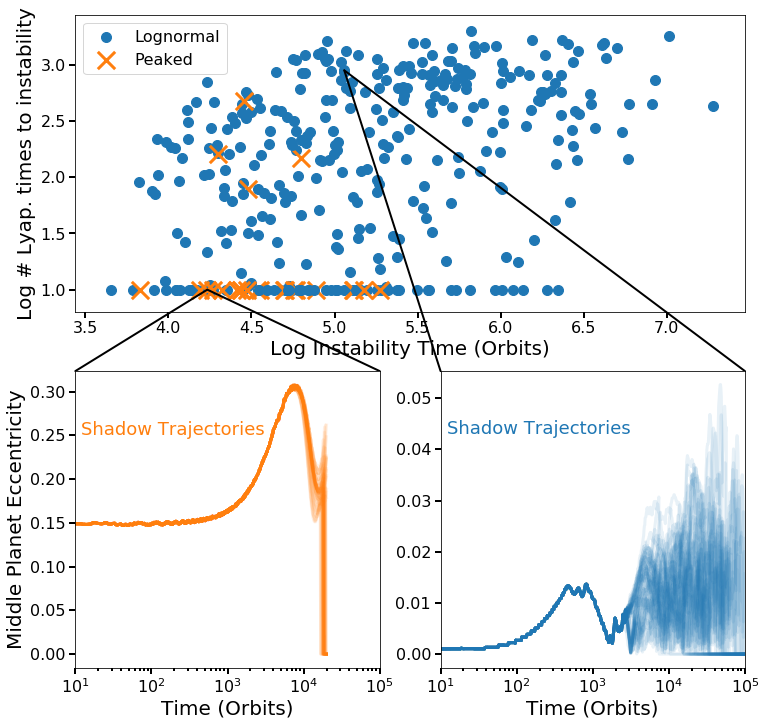

In [13]:
fig = plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(2, 2, figure=fig)

ax1 = plt.subplot(gs[0, 0:])
cmap = plt.get_cmap("tab10")
ax1.scatter(np.log10(dfrand['instability_time'])[~badrand], np.log10(dfrand['Nlyap10'])[~badrand], c=cmap(0), marker='o', label='Lognormal')
ax1.scatter(np.log10(dfrand['instability_time'])[badrand], np.log10(dfrand['Nlyap10'])[badrand], c=cmap(1), marker='x', s=300, label='Peaked')
ax1.scatter(np.log10(dfres['instability_time'])[~badres], np.log10(dfres['Nlyap10'])[~badres], c=cmap(0), marker='o')
ax1.scatter(np.log10(dfres['instability_time'])[badres], np.log10(dfres['Nlyap10'])[badres], c=cmap(1), marker='x', s=300)
ax1.set_xlabel('Log Instability Time (Orbits)')
ax1.set_ylabel('Log # Lyap. times to instability')
ax1.legend()

ax2 = plt.subplot(gs[1, 0])
for i in range(Nshadows):
    ax2.plot(timesexp, eexp[i,:], c=cmap(1), alpha=0.1)
ax2.set_xscale('log')

ax3 = plt.subplot(gs[1, 1])
for i in range(Nshadows):
    ax3.plot(timeslognorm, elognorm[i,:], c=cmap(0), alpha=0.1)
ax3.set_xscale('log')

ax2.set_xlim([10,1.e5])
ax3.set_xlim([10,1.e5])
ax2.set_ylabel('Middle Planet Eccentricity')
ax2.set_xlabel('Time (Orbits)')
ax3.set_xlabel('Time (Orbits)')

ax1.add_artist(ConnectionPatch(xyA=(np.log10(expsample['instability_time']), np.log10(expsample['Nlyap10'])), xyB=(0, 1), coordsA="data", coordsB="axes fraction",
                      axesA=ax1, axesB=ax2, color="k", linewidth=2))
ax1.add_artist(ConnectionPatch(xyA=(np.log10(expsample['instability_time']), np.log10(expsample['Nlyap10'])), xyB=(1, 1), coordsA="data", coordsB="axes fraction",
                      axesA=ax1, axesB=ax2, color="k", linewidth=2))
ax1.add_artist(ConnectionPatch(xyA=(np.log10(lognormsample['instability_time']), np.log10(lognormsample['Nlyap10'])), xyB=(0, 1), coordsA="data", coordsB="axes fraction",
                      axesA=ax1, axesB=ax3, color="k", linewidth=2))
ax1.add_artist(ConnectionPatch(xyA=(np.log10(lognormsample['instability_time']), np.log10(lognormsample['Nlyap10'])), xyB=(1, 1), coordsA="data", coordsB="axes fraction",
                      axesA=ax1, axesB=ax3, color="k", linewidth=2))

ax2.text(12, 0.25, 'Shadow Trajectories', c=cmap(1), fontsize=18)
ax3.text(12, 0.043, 'Shadow Trajectories', c=cmap(0), fontsize=18)
fig.savefig('fig2.pdf', bbox_inches='tight')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


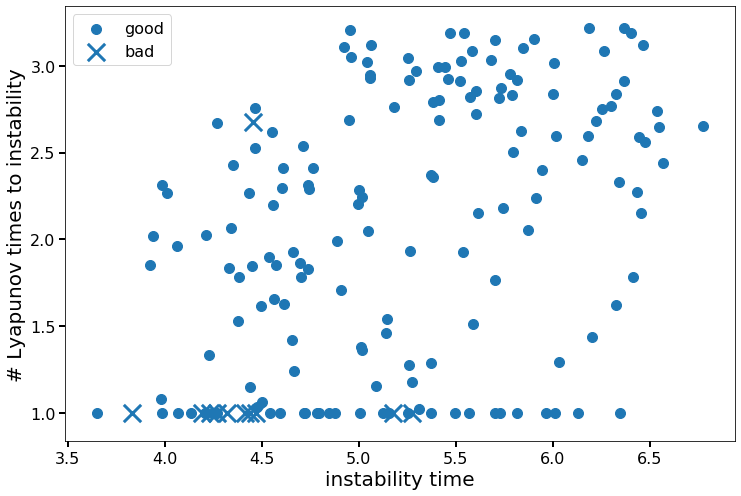

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
cmap = plt.get_cmap("tab10")
ax.scatter(np.log10(dfres['instability_time'])[~badres], np.log10(dfres['Nlyap10'])[~badres], c=cmap(0), marker='o', label='good')
ax.scatter(np.log10(dfres['instability_time'])[badres], np.log10(dfres['Nlyap10'])[badres], c=cmap(0), marker='x', s=300, label='bad')
ax.set_xlabel('instability time')
ax.set_ylabel('# Lyapunov times to instability')
ax.legend()

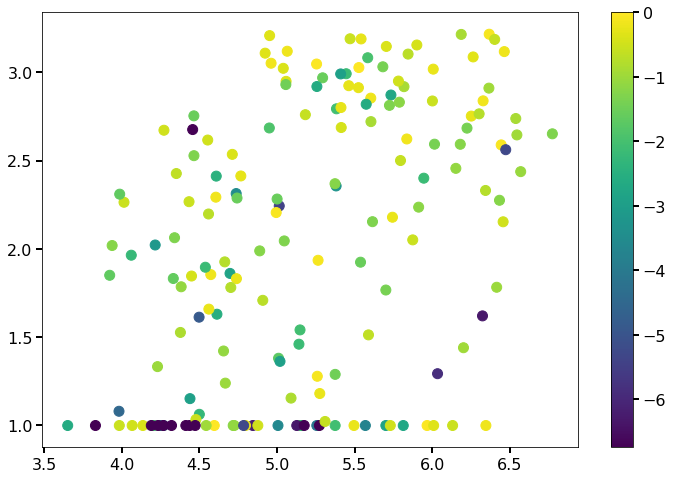

In [15]:
fig, ax = plt.subplots(figsize=(12,8))
cm = plt.cm.get_cmap('RdYlBu')
cb = ax.scatter(np.log10(dfres['instability_time']), np.log10(dfres['Nlyap10']), c=np.log10(dfres['KSpval']), vmin=np.log10(cutoffres))
plt.colorbar(cb)

In [16]:
dfres[badres].sort_values('instability_time')

,ID,instability_time,Mean,Sigma,KSpval,tlyap10,Nlyap10
47,140,6769.926289,4.127658,0.376338,7.466267e-29,677.023806,9.999540
210,334,15500.122677,4.211601,0.037430,8.571698e-21,1550.012268,10.000000
274,60,17146.029774,4.282550,0.084849,2.029285e-18,1714.606441,9.999980
305,89,18514.720049,4.266680,0.018748,4.568072e-21,1851.492789,9.999888
74,165,20927.739160,4.490299,0.309450,1.003507e-15,2092.791236,9.999917
75,166,25867.483431,4.613487,0.362935,7.848025e-13,2586.748343,10.000000
50,143,27414.829370,4.443021,0.011862,2.130629e-25,2741.489865,9.999975
215,34,28632.391603,4.730100,0.399233,2.445296e-09,60.310164,474.752338
312,95,29720.734340,4.520192,0.144736,2.162044e-35,2972.104611,9.999895
232,366,149761.773099,4.870718,0.432133,5.275350e-12,14976.211949,9.999977


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


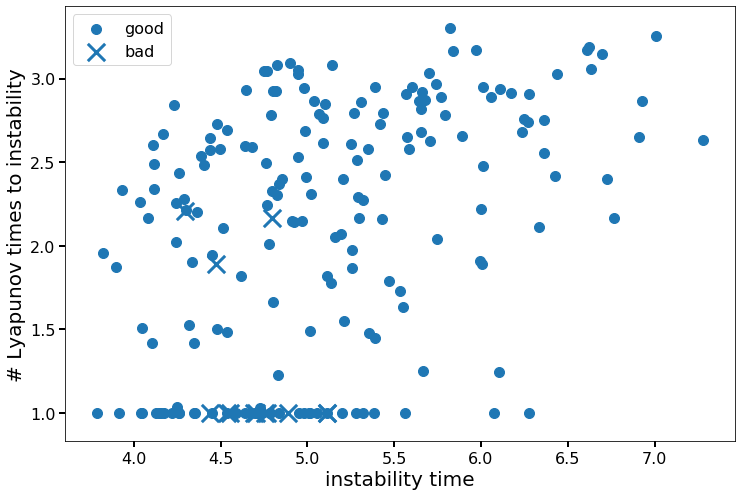

In [17]:
cmap = plt.get_cmap("tab10")
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(np.log10(dfrand['instability_time'])[~badrand], np.log10(dfrand['Nlyap10'])[~badrand], c=cmap(0), marker='o', label='good')
ax.scatter(np.log10(dfrand['instability_time'])[badrand], np.log10(dfrand['Nlyap10'])[badrand], c=cmap(0), marker='x', s=300, label='bad')
ax.set_xlabel('instability time')
ax.set_ylabel('# Lyapunov times to instability')
ax.legend()

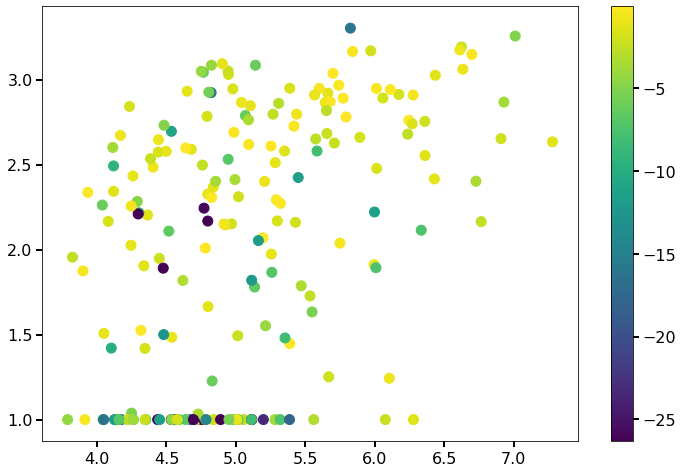

In [18]:
fig, ax = plt.subplots(figsize=(12,8))
cm = plt.cm.get_cmap('RdYlBu')
cb = ax.scatter(np.log10(dfrand['instability_time']), np.log10(dfrand['Nlyap10']), c=np.log10(dfrand['KSpval']), vmin=np.log10(cutoffrand))
plt.colorbar(cb)